#### In this example we will look at how to use the K-Nearest_Neighbor algorithm for classification. We will use a modified version of the Video Store data set for this example. We will use the "Incidentals" attribute as the target attribute for classification (the class attribute). The goal is to be able to classify an unseen instance as "Yes" or "No" given the values of "Incidentals" from training instances.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vstable = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/Video_Store_2.csv", index_col=0)

vstable.shape

(50, 7)

In [3]:
vstable.head()

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
1,M,45000,25,32,2.5,Action,Yes
2,F,54000,33,12,3.4,Drama,No
3,F,32000,20,42,1.6,Comedy,No
4,F,59000,70,16,4.2,Drama,Yes
5,M,37000,35,25,3.2,Action,Yes


In [4]:
vs_names = vstable.columns.values
vs_names

array(['Gender', 'Income', 'Age', 'Rentals', 'Avg Per Visit', 'Genre',
       'Incidentals'], dtype=object)

#### We will be splitting the data into a test and training partitions with the test partition to be used for evaluating model accuracy and the training partition to be used to find the K nearest neighbors. Before spliting the data we need to do a random reshuffling to make sure the instances are randomized.

In [36]:
# Using Cust ID as the DataFrame index

vs = vstable.reindex(np.random.permutation(vstable.index))
vs.head(10)

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
32,M,47000,30,21,3.1,Drama,Yes
29,F,15000,18,37,2.1,Action,Yes
26,F,56000,35,40,2.6,Action,Yes
45,M,56000,38,30,3.5,Drama,Yes
41,F,50000,33,17,1.4,Drama,No
13,M,83000,46,14,3.6,Comedy,No
22,M,25000,33,16,2.9,Drama,Yes
39,F,68000,35,19,3.9,Comedy,No
6,M,18000,20,29,1.7,Action,No


#### The target attribute for classification is Incidentals. These are the class labels (in this case "yes" and "no") corresponding to instances in the data. 

In [37]:
vs_target = vs.Incidentals

#### Before we can compute distances we need to convert the data (excluding the target attribute "incidentals" which contains the class labels) into standard spreadsheet format with dummy variables created for each categorical attribute.

In [38]:
vs = pd.get_dummies(vs[['Gender','Income','Age','Rentals','Avg Per Visit','Genre']])
vs.head(10)

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
32,47000,30,21,3.1,False,True,False,False,True
29,15000,18,37,2.1,True,False,True,False,False
26,56000,35,40,2.6,True,False,True,False,False
45,56000,38,30,3.5,False,True,False,False,True
41,50000,33,17,1.4,True,False,False,False,True
13,83000,46,14,3.6,False,True,False,True,False
22,25000,33,16,2.9,False,True,False,False,True
39,68000,35,19,3.9,True,False,False,True,False
6,18000,20,29,1.7,False,True,True,False,False


#### To be able to evaluate the accuracy of our predictions, we will split the data into training and test sets. In this case, we will use 80% for training and the remaining 20% for testing. Note that we must also do the same split to the target attribute.

In [39]:
tpercent = 0.8
tsize = int(tpercent * len(vs))
vs_train = vs[:tsize]
vs_test = vs[tsize:]

In [40]:
print(vs_train.shape)
print(vs_test.shape)

(40, 9)
(10, 9)


In [41]:
vs_train.head(10)

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
32,47000,30,21,3.1,False,True,False,False,True
29,15000,18,37,2.1,True,False,True,False,False
26,56000,35,40,2.6,True,False,True,False,False
45,56000,38,30,3.5,False,True,False,False,True
41,50000,33,17,1.4,True,False,False,False,True
13,83000,46,14,3.6,False,True,False,True,False
22,25000,33,16,2.9,False,True,False,False,True
39,68000,35,19,3.9,True,False,False,True,False
6,18000,20,29,1.7,False,True,True,False,False


In [42]:
vs_test

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
15,68000,30,36,2.7,False,True,False,True,False
9,38000,21,18,2.1,False,True,False,True,False
33,23000,25,28,2.7,False,True,True,False,False
49,31000,25,42,3.4,False,True,True,False,False
12,26000,22,32,2.9,True,False,True,False,False
14,45000,36,24,2.7,False,True,False,False,True
31,49000,56,15,3.2,True,False,False,True,False
20,12000,16,23,2.2,False,True,True,False,False
18,6000,16,39,1.8,True,False,True,False,False


#### Splitting the target attribute ("Incidentals") accordingly:

In [43]:
vs_target_train = vs_target[0:int(tsize)]
vs_target_test = vs_target[int(tsize):len(vs)]

In [44]:
vs_target_train.head()

Cust ID
32    Yes
29    Yes
26    Yes
45    Yes
41     No
Name: Incidentals, dtype: object

In [45]:
vs_target_test

Cust ID
15    Yes
9      No
33     No
49    Yes
12    Yes
14     No
31     No
20    Yes
18    Yes
34    Yes
Name: Incidentals, dtype: object

#### Next, we normalize the attributes so that everything is in [0,1] scale. We can use the normalization functions we developed in earlier examples. In this case, however, we will use the more flexible and robust scaler function from the preprocessing module of scikit-learn package. <i>important Note: we train the scaler on the training portion of the data only. Then we use the scaler to transform (normalize) both the training and then test partitions</i>

In [46]:
from sklearn import preprocessing

In [47]:
# Fit the scaler to the training data
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(vs_train)

MinMaxScaler()

In [48]:
# Use the scaler to transfrom both training and test data sets
vs_train_norm = min_max_scaler.transform(vs_train)
vs_test_norm = min_max_scaler.transform(vs_test)

#### Note that MinMaxScaler returns a Numpy nd-array).

In [49]:
np.set_printoptions(precision=2, linewidth=100)

print(vs_train_norm[:10])

[[0.52 0.27 0.31 0.56 0.   1.   0.   0.   1.  ]
 [0.16 0.05 0.72 0.28 1.   0.   1.   0.   0.  ]
 [0.62 0.36 0.79 0.42 1.   0.   1.   0.   0.  ]
 [0.62 0.42 0.54 0.67 0.   1.   0.   0.   1.  ]
 [0.56 0.33 0.21 0.08 1.   0.   0.   0.   1.  ]
 [0.93 0.56 0.13 0.69 0.   1.   0.   1.   0.  ]
 [0.27 0.33 0.18 0.5  0.   1.   0.   0.   1.  ]
 [0.76 0.36 0.26 0.78 1.   0.   0.   1.   0.  ]
 [0.19 0.09 0.51 0.17 0.   1.   1.   0.   0.  ]
 [0.83 0.25 0.87 0.97 0.   1.   1.   0.   0.  ]]


In [50]:
print(vs_test_norm[:10])

[[0.76 0.27 0.69 0.44 0.   1.   0.   1.   0.  ]
 [0.42 0.11 0.23 0.28 0.   1.   0.   1.   0.  ]
 [0.25 0.18 0.49 0.44 0.   1.   1.   0.   0.  ]
 [0.34 0.18 0.85 0.64 0.   1.   1.   0.   0.  ]
 [0.28 0.13 0.59 0.5  1.   0.   1.   0.   0.  ]
 [0.5  0.38 0.38 0.44 0.   1.   0.   0.   1.  ]
 [0.55 0.75 0.15 0.58 1.   0.   0.   1.   0.  ]
 [0.12 0.02 0.36 0.31 0.   1.   1.   0.   0.  ]
 [0.06 0.02 0.77 0.19 1.   0.   1.   0.   0.  ]
 [0.32 0.31 0.26 0.5  1.   0.   1.   0.   0.  ]]


#### For consitency, we'll also convert the training and test target labels into Numpy arrays.

In [51]:
# vs_target_train = np.array(vs_target_train)
# vs_target_test = np.array(vs_target_test)

#### The following function illustrates how we can perform a k-nearest-neighbor search. It takes an instance x (a row in the test data) to be classifed and a data matrix D (assumed to be a 2d Numpy array) as inputs. It also takes K (the desired number of nearest-neighbors to be identified), and "measure" as arguments. The "measure" argument allows us to use either Euclidean distance (measure=0) or (the inverse of) Cosine similarity (measure = 1) as the distance function:

In [52]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

#### To test our function, we'll use the first instance in the test data as the instance x as input to the knn_search function and find its K nearest neighbors in the training data.

In [53]:
# We'll use K = 5 and Euclidean distance for this example
neigh_idx, distances = knn_search(vs_test_norm[0], vs_train_norm, 5, 0)

In [54]:
# This was the (non-normalized version of the) test instance used
vs_test.head(1)

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
15,68000,30,36,2.7,False,True,False,True,False


In [55]:
# Let's show the indexes of the 5 nearest neighbors and the neirghbors, themselves, in the original training data

print(neigh_idx)
print("\nNearest Neigbors:")
vs_train.iloc[neigh_idx]

[32  5 26 25 35]

Nearest Neigbors:


,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
28,57000,52,22,4.1,False,True,False,True,False
13,83000,46,14,3.6,False,True,False,True,False
37,89000,46,12,1.2,False,True,False,True,False
25,1000,16,25,1.4,False,True,False,True,False
8,74000,25,31,2.4,False,True,True,False,False


In [56]:
# And here are the distances of the above neighbors to the test instance
print(distances[neigh_idx])

[0.68 0.7  0.83 0.92 1.43]


###  Let's see how the nearest neighbors of the test instance labeled the target attribute "incidentals"

In [57]:
neigh_labels = vs_target_train[neigh_idx]
print(neigh_labels)

Cust ID
32    Yes
5     Yes
26    Yes
25    Yes
35    Yes
Name: Incidentals, dtype: object


#### Now that we know the nearest neighbors, we need to find the majority class label among them. The majority class would be the class assgined to the new instance x.

In [58]:
from collections import Counter
print(Counter(neigh_labels))

Counter({'Yes': 5})


In [59]:
Counter(neigh_labels).most_common(1)

[('Yes', 5)]

#### Let's now put everything together into a function that calls our knn_search function and then returns that majority class among the K nearest neighbors of the instance to be classified. This is our "classifier function."

In [60]:
def knn_classify(x, D, K, labels, measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    print("Labels for top ", K, "neighbors: ", count.most_common())
    return count.most_common(1)[0][0]

#### We can now use our KNN classifer to evaluate it's classification accuracy. Here we will run the classifier on each test instance in our test data and compare the predicted class to the actual class for each. We will maintain the number of disagreements which allows us to compute the final error rate across all test instances. The following code assumes that the training and test target attribute labels are in Numpy arrays, so we will first convert these from Pandas DataFrames.

In [62]:
vs_target_train_arr = np.array(vs_target_train)
vs_target_test_arr = np.array(vs_target_test)

In [64]:
# Total number of test instances
numTestVecs = len(vs_target_test_arr)
print(numTestVecs)

10


In [65]:
errorCount = 0.0
for i in range(numTestVecs):
    classifierResult = knn_classify(vs_test_norm[i,:], vs_train_norm, 5, vs_target_train_arr, 0)
    print("Predicted Label: ", classifierResult, "==> Actual Label: ", vs_target_test_arr[i])
    print()
    if (classifierResult != vs_target_test_arr[i]): 
          errorCount += 1.0
        
print("Classification Accuracy: ", 1 - (errorCount/float(numTestVecs)))

Labels for top  5 neighbors:  [('No', 3), ('Yes', 2)]
Predicted Label:  No ==> Actual Label:  Yes

Labels for top  5 neighbors:  [('No', 4), ('Yes', 1)]
Predicted Label:  No ==> Actual Label:  No

Labels for top  5 neighbors:  [('Yes', 4), ('No', 1)]
Predicted Label:  Yes ==> Actual Label:  No

Labels for top  5 neighbors:  [('Yes', 3), ('No', 2)]
Predicted Label:  Yes ==> Actual Label:  Yes

Labels for top  5 neighbors:  [('Yes', 3), ('No', 2)]
Predicted Label:  Yes ==> Actual Label:  Yes

Labels for top  5 neighbors:  [('Yes', 5)]
Predicted Label:  Yes ==> Actual Label:  No

Labels for top  5 neighbors:  [('No', 5)]
Predicted Label:  No ==> Actual Label:  No

Labels for top  5 neighbors:  [('Yes', 3), ('No', 2)]
Predicted Label:  Yes ==> Actual Label:  Yes

Labels for top  5 neighbors:  [('No', 3), ('Yes', 2)]
Predicted Label:  No ==> Actual Label:  Yes

Labels for top  5 neighbors:  [('Yes', 4), ('No', 1)]
Predicted Label:  Yes ==> Actual Label:  Yes

Classification Accuracy:  0.6


#### Let's put this evaluation code into a function that we can resuse easily with different parameters of KNN classifier. We'll also create a new version of the classifier without the extraneous output which returns predicted label and the top K neighbors.

In [66]:
def knn_classify(x, D, K, labels, measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    # print("Labels for top", K, "neighbors: ", count)
    predicted_label = count.most_common(1)[0][0]
    return neigh_idx, predicted_label

In [69]:
def knn_evaluate(test, test_labels, train, train_labels, K, measure):
    # Inputs:
    # test: an array or list of test instances
    # test_labels: an array or list of class labels for the corresponding test instances in test
    # train: the training instances
    # train_labels: class labels for the corresponding training instances in train
    # K: number of neighbors
    # measure: 0 = Euclidean distance; 1 = Cosine distance

    T=0 # no. of correctly classified instances
    F=0 # no. of incorrectly classified instances
    for i in range(len(test)):
        actual=test_labels[i]
        top_K_neighbors, predicted = knn_classify(test[i], train, K, train_labels, measure)
        if actual == predicted:
            T += 1       
        else:
            F += 1     
    accuracy = float(T)/float(T+F) 
    return accuracy

In [70]:
# Testing the evaluation function with K =5 and Euclidean distance on the full test set
accuracy = knn_evaluate(vs_test_norm, vs_target_test_arr, vs_train_norm, vs_target_train_arr, 5, 0)

print("Classification Accuracy: ", accuracy)

Classification Accuracy:  0.6


In [72]:
# Let's compare this to the accuracy on the training data, itself
accuracy = knn_evaluate(vs_train_norm, vs_target_train_arr, vs_train_norm, vs_target_train_arr, 5, 0)

print("Classification Accuracy (Train): ", accuracy)

Classification Accuracy (Train):  0.775


#### Let's repeat with the distance metric based on Cosine similarity (instead of Euclidean distance):

In [73]:
# Testing the evaluation function with K =5 and Cosine distance on the full test set
accuracy = knn_evaluate(vs_test_norm, vs_target_test_arr, vs_train_norm, vs_target_train_arr, 5, 1)

print("Classification Accuracy: ", accuracy)

Classification Accuracy:  0.6


In [74]:
Euclid=[]
for K in range(1, 40):
    Euclid.append(knn_evaluate(vs_test_norm, vs_target_test_arr, vs_train_norm, vs_target_train_arr, K, 0))

print(Euclid)

[0.6, 0.6, 0.6, 0.7, 0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.4, 0.4, 0.4, 0.5, 0.5, 0.4, 0.5, 0.4, 0.5, 0.7, 0.5, 0.8, 0.7, 0.7, 0.7, 0.6, 0.7]


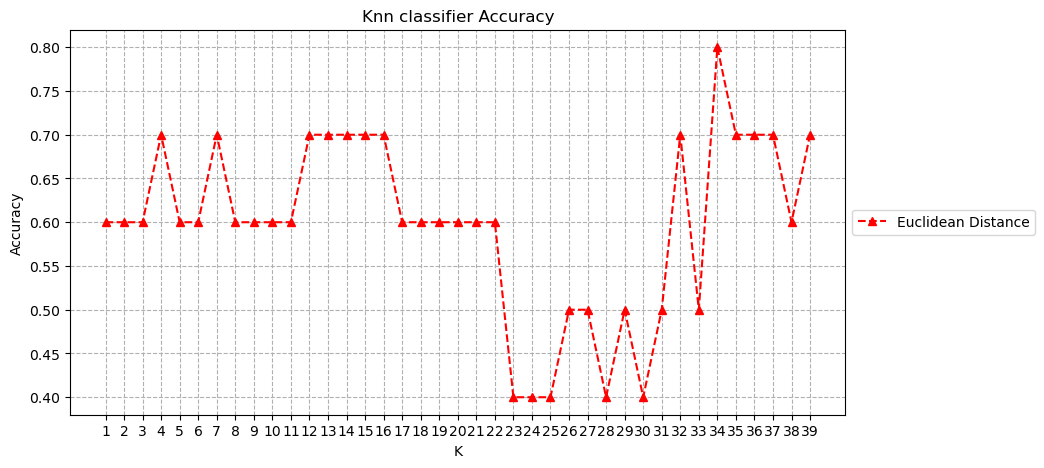

In [75]:
Ks=list(range(1, 40))
plt.figure(figsize=(10,5))
plt.plot(Ks, Euclid, 'r^--', label='Euclidean Distance')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### A better way to split the data into training and test sets

In [76]:
from sklearn.model_selection import train_test_split
vs_train2, vs_test2, vs_target_train2, vs_target_test2 = train_test_split(vs, vs_target, test_size=0.2, random_state=44)

print (vs_test2.shape)
print (vs_train2.shape)

(10, 9)
(40, 9)


In [77]:
vs_test2

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
27,62000,47,32,3.6,True,False,False,False,True
22,25000,33,16,2.9,False,True,False,False,True
20,12000,16,23,2.2,False,True,True,False,False
10,65000,40,21,3.3,True,False,False,False,True
13,83000,46,14,3.6,False,True,False,True,False
12,26000,22,32,2.9,True,False,True,False,False
47,69000,35,22,2.8,True,False,False,False,True
2,54000,33,12,3.4,True,False,False,False,True
15,68000,30,36,2.7,False,True,False,True,False


In [78]:
vs_target_test2 

Cust ID
27     No
22    Yes
20    Yes
10     No
13     No
12    Yes
47    Yes
2      No
15    Yes
50     No
Name: Incidentals, dtype: object

In [79]:
vs_train2.head(10)

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
4,59000,70,16,4.2,True,False,False,False,True
37,89000,46,12,1.2,False,True,False,True,False
23,2000,15,30,2.5,True,False,False,True,False
11,41000,22,48,2.3,True,False,False,False,True
44,35000,24,24,1.7,False,True,False,False,True
26,56000,35,40,2.6,True,False,True,False,False
43,49000,28,48,3.3,True,False,False,False,True
42,32000,25,26,2.2,False,True,True,False,False
9,38000,21,18,2.1,False,True,False,True,False


#### After the split, we should agan perform the normalization as before.